# 主題:大盤加權指數漲跌預測

## 組員:黃柏倫B05201023、劉宜婕B06703049、姚宣羽B05201018

# 介紹:

https://reurl.cc/6Yvjy

受到本篇分析報告的啟發，發現全球股市有連動的效果，各國的指數與隔日台股漲跌息息相關，希望能藉由全球股市的資料進行分析!

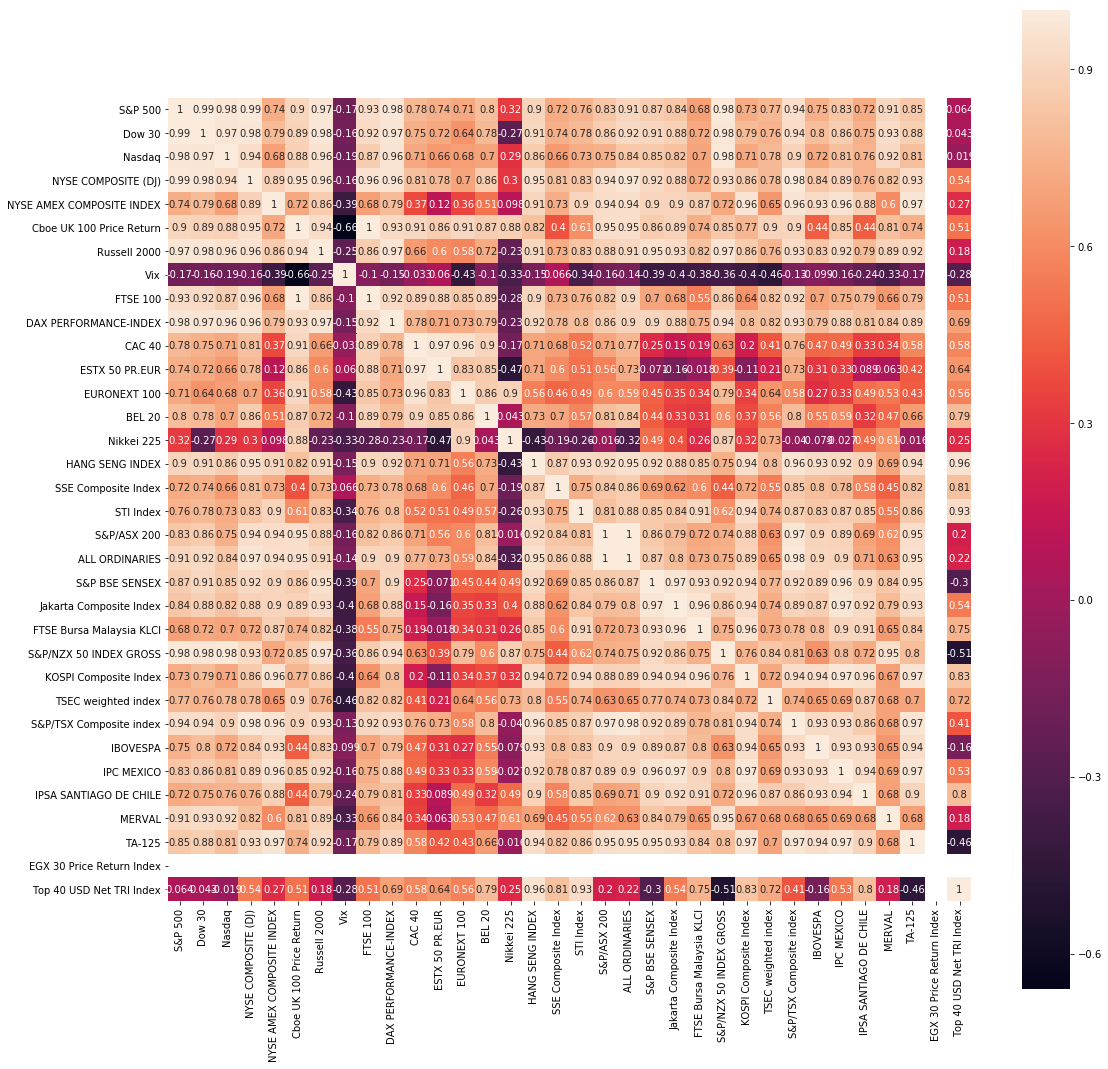

# 目的:
希望能找出有效的feature去預測大盤的走向，進而增加投資效率

# 實作方式:

input:大盤盤後資訊(價量、期貨)、國際指數、財金新聞(保留)、k線截圖(保留)

output:漲(上漲超過0.5%)、跌(下跌超過0.5%)、平(介於+-0.5%)

1.利用前10日大盤盤後資訊搭配NN,RNN(LSTM)預測

2.利用API建構不同MODEL測試

3.嘗試利用相關係數高的指數作為input

*4.利用財金新聞標題作為input搭配RNN(LSTM)預測

*5.利用k線截圖作為input搭配CNN預測

*:保留或是未來展望


# 專案排程:

~5/24 資料抓取和前期處理

~5/31 設計並訓練各式各樣模型

~6/2 改善預測結果，考慮增加其他input

~6/6 彙整結果並撰寫期末專案報告

# 統整

我們總共訓練了五個模型，分別是以下五個

1.從前十日收盤價預測股價漲、跌、還是盤整<br>
    模型:RNN(LSTM)<br>
    預測準確率:0.3831135902636917<br>
    隨機預測準確率:0.34026369168356996<br>
    
    
2.從前十日收盤價預測股價漲、跌、還是盤整<br>
    模型:NN<br>
    預測準確率:0.3815922920892495<br>
    隨機預測準確率:0.34026369168356996
    
    
3.從其他國際市場指數+台股大盤指數，預測台股大盤指數漲、跌、還是盤整<br>
    模型:NN<br>
    預測準確率:0.4011834321642768
    
    
4.利用外資買賣超市值(籌碼資訊)預測台股大盤指數漲、跌、還是盤整<br>
    模型:NN<br>
    預測準確率:0.3938336240267462 
    
    
5.利用盤後總資訊(價格,籌碼)預測台股大盤指數漲、跌、還是盤整<br>
    模型:NN<br>
    預測準確率:0.36728579995159333


# 結論 
    
    在這五個模型當中，表現最好的是第3組模型，運用香港恆生以及台股大盤指數一起進行模型訓練和預測。其他不管是運用台股大盤指數本身收盤價，抑或是盤後資訊來預測，準確度都沒有明顯提升，之後的研究方向可以朝:
    (1)運用其他模型(除了NN、RNN(LSTM))，相同資料來預測
    (2)運用前述所說新聞、走勢圖識別來預測
    或許準確率會再進行提升

    補充:原先以為第3組模型若改為運用RNN多加其他國際市場指數(和以下跟台股大盤走勢相關係數高的指數一起預測，效果會提升)，但最後結果準確率只停留在0.3961左右，沒有明顯提升，比單純運用NN和香港恆生的資料預測還低
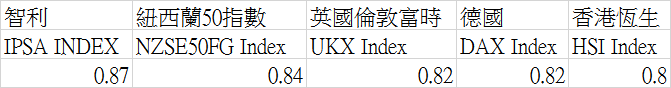

# 1.利用RNN從前十日收盤價預測股價漲跌平

In [58]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
%env KERAS_BACKEND = tensorflow

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.utils import np_utils

env: KERAS_BACKEND=tensorflow


## 資料處理

In [60]:
df=pd.read_excel('C:/Users/黃柏倫/Desktop/data/python project/大盤指數盤後數據.xlsx',header=0)

In [61]:
X = [] # empty list
Y = [] # empty list
n = 10 # 取前n日收盤價作為input
for i in range(len(df.index)-n):
    X.append(list(df.loc[i:i+(n-1)]['收盤價']))
    Y.append(df.漲跌平[i+n])

In [62]:
np.any(np.isnan(df.收盤價))

False

In [63]:
X = np.array(X)
X = X.reshape(13144, n, 1)

In [64]:
# 標準化
for i in range(13144):
    X[i] = X[i] - X[i].min()
    X[i] = X[i] / X[i].max()

In [65]:
# one-hot encoding
Y = np_utils.to_categorical(Y, 3)

In [66]:
Y.shape

(13144, 3)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# 分割訓練資料和測試資料
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 9487)

## 模型建立

In [69]:
x = Input(shape=(10, 1))
f_1 = LSTM(20, return_sequences=True)
f_4 = Dropout(0.3)
f_2 = LSTM(20)
f_5 = Dropout(0.3)
f_3 = Dense(3, activation='softmax')

h_1 = f_1(x)
z_1 = f_4(h_1)
h_2 = f_2(z_1)
z_2 = f_5(h_2)
y = f_3(z_2)

model = Model(x, y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10, 1)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 20)            1760      
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 20)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 63        
Total params: 5,103
Trainable params: 5,103
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss="categorical_crossentropy", optimizer='RMSprop', metrics=['accuracy'])

In [71]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
9200/9200 [==============================] - 5s 491us/step - loss: 1.0958 - acc: 0.3663
Epoch 2/10
9200/9200 [==============================] - 2s 262us/step - loss: 1.0942 - acc: 0.3688
Epoch 3/10
9200/9200 [==============================] - 3s 289us/step - loss: 1.0932 - acc: 0.3693
Epoch 4/10
9200/9200 [==============================] - 3s 303us/step - loss: 1.0924 - acc: 0.3695
Epoch 5/10
9200/9200 [==============================] - 3s 299us/step - loss: 1.0920 - acc: 0.3723
Epoch 6/10
9200/9200 [==============================] - 3s 339us/step - loss: 1.0911 - acc: 0.3687
Epoch 7/10
9200/9200 [==============================] - 3s 293us/step - loss: 1.0916 - acc: 0.3665
Epoch 8/10
9200/9200 [==============================] - 3s 312us/step - loss: 1.0909 - acc: 0.3685
Epoch 9/10
9200/9200 [==============================] - 3s 310us/step - loss: 1.0911 - acc: 0.3717
Epoch 10/10
9200/9200 [==============================] - 3s 326us/step - loss: 1.0911 - acc: 0.3718


## 預測結果

In [72]:
model.evaluate(x_test, y_test)

3944/3944 [==============================] - 1s 146us/step


[1.090704238197141, 0.3831135902636917]

In [73]:
print("模型預測正確率為：", model.evaluate(x_test, y_test)[1])

3944/3944 [==============================] - 0s 67us/step
模型預測正確率為： 0.3831135902636917


In [74]:
model.predict(x_test)

array([[0.35314536, 0.32666284, 0.3201918 ],
       [0.234635  , 0.38691026, 0.37845474],
       [0.2935845 , 0.36372617, 0.34268934],
       ...,
       [0.35973078, 0.3254066 , 0.31486258],
       [0.30312026, 0.350222  , 0.34665778],
       [0.31757   , 0.34091604, 0.341514  ]], dtype=float32)

In [75]:
predict = model.predict(x_test)
np.argmax(predict,axis=1)

array([0, 1, 1, ..., 0, 1, 2], dtype=int64)

In [76]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(np.argmax(y_test,axis=1), np.argmax(predict,axis=1))

array([[ 272,  894,   15],
       [ 267, 1220,   25],
       [ 239,  993,   19]], dtype=int64)

## 與隨機預測比較

In [79]:
np.argmax(y_test,axis=1).shape

(3944,)

In [80]:
randompredict = np.random.randint(3, size=(3944,))

In [84]:
cm=confusion_matrix(np.argmax(y_test,axis=1), randompredict)
cm

array([[421, 394, 366],
       [516, 505, 491],
       [401, 434, 416]], dtype=int64)

In [87]:
print("隨機預測正確率為：",(cm[0][0]+cm[1][1]+cm[2][2])/len(np.argmax(y_test,axis=1)))

隨機預測正確率為： 0.34026369168356996


## 實際與預測結果比較圖

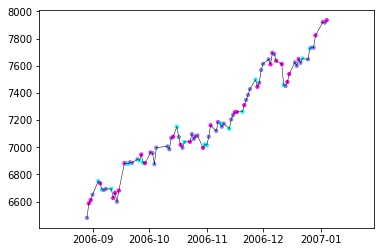

In [88]:
st=10000
end=10100
plt.scatter(np.array(df.年月日)[n+st:end],np.array(df.收盤價)[n+st:end],c=np.array(df.漲跌平)[st:end-n],s=10,cmap='cool')
plt.plot(np.array(df.年月日)[n+st:end],np.array(df.收盤價)[n+st:end],c='black', linewidth=0.5)

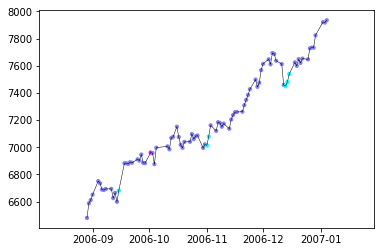

In [89]:
st=10000
end=10100
plt.scatter(np.array(df.年月日)[n+st:end],np.array(df.收盤價)[n+st:end],c=np.argmax(model.predict(X),axis=1)[st:end-n],s=10,cmap='cool')
plt.plot(np.array(df.年月日)[n+st:end],np.array(df.收盤價)[n+st:end],c='black', linewidth=0.5)

# 2.利用NN從前十日收盤價預測股價漲跌平¶

In [90]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
%env KERAS_BACKEND = tensorflow

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.initializers import he_normal

env: KERAS_BACKEND=tensorflow


## 資料處理

In [92]:
df=pd.read_excel('C:/Users/黃柏倫/Desktop/data/python project/大盤指數盤後數據.xlsx',header=0)

In [93]:
X = [] #empty list
Y = [] #empty list
n = 10 # 取前n日收盤價作為input
for i in range(len(df.index)-n):
    X.append(list(df.loc[i:i+(n-1)]['收盤價']))
    Y.append(df.漲跌平[i+n])

In [94]:
np.any(np.isnan(df.收盤價))

False

In [95]:
X = np.array(X)

In [97]:
# 標準化
for i in range(13144):
    X[i] = X[i] - X[i].min()
    X[i] = X[i] / X[i].max()

In [98]:
# one-hot encoding
Y = np_utils.to_categorical(Y, 3)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
# 分割訓練資料和測試資料
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 9487)

## 模型建立

In [101]:
x = Input(shape=(10,))
f_1 = Dense(16, activation='relu', kernel_initializer=he_normal(seed=333))
f_4 = Dropout(0.5)
f_2 = Dense(8, activation='relu', kernel_initializer=he_normal(seed=333))
f_3 = Dense(3, activation='softmax')

h_1 = f_1(x)
z_1 = f_4(h_1)
h_2 = f_2(z_1)
y = f_3(h_2)

model = Model(x, y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                176       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 27        
Total params: 339
Trainable params: 339
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])

In [103]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
9200/9200 [==============================] - 1s 107us/step - loss: 1.1272 - acc: 0.3466
Epoch 2/10
9200/9200 [==============================] - 0s 38us/step - loss: 1.0987 - acc: 0.3582
Epoch 3/10
9200/9200 [==============================] - 0s 38us/step - loss: 1.0937 - acc: 0.3652
Epoch 4/10
9200/9200 [==============================] - 0s 41us/step - loss: 1.0937 - acc: 0.3610
Epoch 5/10
9200/9200 [==============================] - 0s 40us/step - loss: 1.0907 - acc: 0.3708
Epoch 6/10
9200/9200 [==============================] - 0s 43us/step - loss: 1.0924 - acc: 0.3741
Epoch 7/10
9200/9200 [==============================] - ETA: 0s - loss: 1.0927 - acc: 0.369 - 0s 45us/step - loss: 1.0920 - acc: 0.3703
Epoch 8/10
9200/9200 [==============================] - 0s 42us/step - loss: 1.0904 - acc: 0.3727
Epoch 9/10
9200/9200 [==============================] - 0s 43us/step - loss: 1.0905 - acc: 0.3761
Epoch 10/10
9200/9200 [==============================] - 0s 42us/step - loss: 1

## 預測結果

In [104]:
model.evaluate(x_test, y_test)

3944/3944 [==============================] - 0s 79us/step


[1.0897259119799847, 0.3815922920892495]

In [105]:
print("模型預測正確率為：", model.evaluate(x_test, y_test)[1])

3944/3944 [==============================] - 0s 19us/step
模型預測正確率為： 0.3815922920892495


In [106]:
model.predict(x_test)

array([[0.32620326, 0.3434593 , 0.33033746],
       [0.26426807, 0.37657455, 0.35915732],
       [0.29717702, 0.3577361 , 0.34508684],
       ...,
       [0.33478162, 0.34995103, 0.31526738],
       [0.30395883, 0.36210242, 0.33393884],
       [0.358656  , 0.33939332, 0.30195072]], dtype=float32)

In [107]:
predict = model.predict(x_test)
np.argmax(predict,axis=1)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [108]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
confusion_matrix(np.argmax(y_test,axis=1), np.argmax(predict,axis=1))

array([[  36, 1020,  125],
       [  30, 1298,  184],
       [  29, 1051,  171]], dtype=int64)

## 與隨機預測比較

In [111]:
np.argmax(y_test,axis=1).shape

(3944,)

In [112]:
randompredict = np.random.randint(3, size=(3944,))

In [84]:
cm=confusion_matrix(np.argmax(y_test,axis=1), randompredict)
cm

array([[421, 394, 366],
       [516, 505, 491],
       [401, 434, 416]], dtype=int64)

In [87]:
print("隨機預測正確率為：",(cm[0][0]+cm[1][1]+cm[2][2])/len(np.argmax(y_test,axis=1)))

隨機預測正確率為： 0.34026369168356996


## 實際與預測結果比較圖

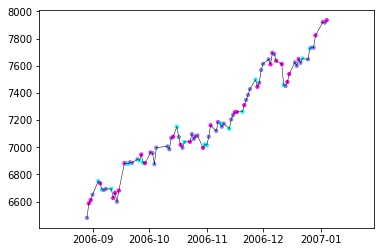

In [115]:
st=10000
end=10100
plt.scatter(np.array(df.年月日)[n+st:end],np.array(df.收盤價)[n+st:end],c=np.array(df.漲跌平)[st:end-n],s=10,cmap='cool')
plt.plot(np.array(df.年月日)[n+st:end],np.array(df.收盤價)[n+st:end],c='black', linewidth=0.5)

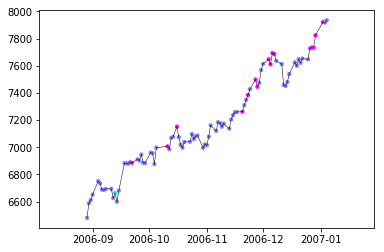

In [116]:
st=10000
end=10100
plt.scatter(np.array(df.年月日)[n+st:end],np.array(df.收盤價)[n+st:end],c=np.argmax(model.predict(X),axis=1)[st:end-n],s=10,cmap='cool')
plt.plot(np.array(df.年月日)[n+st:end],np.array(df.收盤價)[n+st:end],c='black', linewidth=0.5)

# 3.多重輸入利用NN模型預測大盤指數

## Loading Data

In [117]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df=pd.read_excel("C:/Users/黃柏倫/Desktop/data/python project/大盤指數盤後數據.xlsx",header=0)

In [119]:
dg=pd.read_excel("C:/Users/黃柏倫/Desktop/data/python project/全球new.xlsx",header=0)

In [120]:
dg=dg[2:]

# 利用香港恆生資料(高相關係數)來進行預測

## 資料處理

In [121]:
from keras.utils import np_utils

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, add

In [124]:
from keras.models import Model
from keras.layers import Input,concatenate,Dropout

In [125]:
def nor(t):
    t-= t.min()
    t =t/t.max()
    return t

In [126]:
df['年月日']=pd.to_datetime(df['年月日'])
dg['年月日']=pd.to_datetime(dg['年月日'])

In [127]:
d_txoc=df[['年月日','收盤價']]
d_txov=df[['年月日','成交值']]
d_ups=df[['年月日','漲跌平']]
d_hsi=dg[['年月日','香港恆生']]

In [128]:
DF=pd.merge(d_txoc,d_txov)
DF=pd.merge(DF,d_ups)
DF=pd.merge(DF,d_hsi)
DF.index=range(len(DF))
DF.head()

,年月日,收盤價,成交值,漲跌平,香港恆生
0,1997-01-04,6820.35,36466000,0.0,13222.8
1,1997-01-06,6844.75,35696000,1.0,13443.9
2,1997-01-07,6875.02,50760000,1.0,13420.2
3,1997-01-08,7019.43,79860000,2.0,13454.9
4,1997-01-09,7010.76,81908000,1.0,13198.1


In [129]:
dfc=np.array(DF['收盤價'])
dfv=np.array(DF['成交值'])
dfh=np.array(DF['香港恆生'])
dfups=np.array(DF['漲跌平'])
dfd=DF['年月日']

In [130]:
a=[]
b=[]
c=[]
y=[]
n=5
after=0
for i in range(len(DF.index)-n):
    a.append(dfc[after+i:after+i+n])
    b.append(dfv[after+i:after+i+n])
    c.append(dfh[after+i:after+i+n])
    y.append(DF.漲跌平[after+i+n])
a=np.array(a).reshape(len(a),n)
b=np.array(b).reshape(len(b),n)
c=np.array(c).reshape(len(b),n)
yy = np_utils.to_categorical(y, 3)

In [136]:
# 用了會預測結果很極端
'''for i in range(len(a)):
    a[i]=nor(a[i])
    b[i]=nor(b[i])
    c[i]=nor(c[i])'''

'for i in range(len(a)):\n    a[i]=nor(a[i])\n    b[i]=nor(b[i])\n    c[i]=nor(c[i])'

In [137]:
se=87
a_train,a_test,y_train,y_test=train_test_split(a,yy,test_size=0.3,random_state=se)
b_train,b_test,y_train,y_test=train_test_split(b,yy,test_size=0.3,random_state=se)
c_train,c_test,y_train,y_test=train_test_split(c,yy,test_size=0.3,random_state=se)

## 建立模型

In [138]:
f_1 = Dense(300,input_dim=n, activation='sigmoid')
g_1 = Dense(300,input_dim=n, activation='sigmoid')
fg_1= Dense(150,input_dim=n, activation='relu')
h_1 = Dense(300,input_dim=n, activation='sigmoid')

z_1 = Dense(3, activation='softmax')

In [139]:
a0 = Input(shape=(n,))
b0 = Input(shape=(n,))
c0 = Input(shape=(n,))

a1 = f_1(a0)
b1 = g_1(b0)

u1 = concatenate([a1,b1])
ab = fg_1(u1)

c1 = h_1(c0)

u2 = concatenate([ab,c1])

q = z_1(u2)

In [140]:
model = Model([a0,b0,c0],q )
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 300)          1800        input_8[0][0]                    
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 300)          1800        input_9[0][0]                    
__________________________________________________________________________________________________
concatenat

In [141]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,validation)

## 訓練與預測

In [142]:
model.fit([a_train,b_train,c_train], y_train,batch_size=100,epochs=20)

Epoch 1/20
3942/3942 [==============================] - 1s 230us/step - loss: 1.1049 - acc: 0.3889
Epoch 2/20
3942/3942 [==============================] - 0s 46us/step - loss: 1.1086 - acc: 0.3828
Epoch 3/20
3942/3942 [==============================] - 0s 43us/step - loss: 1.0913 - acc: 0.3965
Epoch 4/20
3942/3942 [==============================] - 0s 45us/step - loss: 1.0973 - acc: 0.3785
Epoch 5/20
3942/3942 [==============================] - 0s 45us/step - loss: 1.0892 - acc: 0.3983
Epoch 6/20
3942/3942 [==============================] - 0s 45us/step - loss: 1.0818 - acc: 0.4094
Epoch 7/20
3942/3942 [==============================] - 0s 47us/step - loss: 1.0791 - acc: 0.4145
Epoch 8/20
3942/3942 [==============================] - 0s 41us/step - loss: 1.0763 - acc: 0.4191
Epoch 9/20
3942/3942 [==============================] - 0s 41us/step - loss: 1.0821 - acc: 0.4049
Epoch 10/20
3942/3942 [==============================] - 0s 37us/step - loss: 1.0799 - acc: 0.4011
Epoch 11/20
3942/3

In [143]:
model.evaluate([a_test,b_test,c_test], y_test)

1690/1690 [==============================] - 0s 183us/step


[1.1119032309605525, 0.4011834321642768]

In [144]:
model.predict([a_test,b_test,c_test])

array([[0.18052956, 0.53331053, 0.28615984],
       [0.19667868, 0.565766  , 0.23755533],
       [0.17979735, 0.57568455, 0.24451804],
       ...,
       [0.17882107, 0.5167674 , 0.30441153],
       [0.23168576, 0.4877711 , 0.28054318],
       [0.19049935, 0.52922314, 0.28027758]], dtype=float32)

## 視覺化

In [145]:
yp = model.predict([a,b,c])
ypp=np.argmax(yp,axis=1)

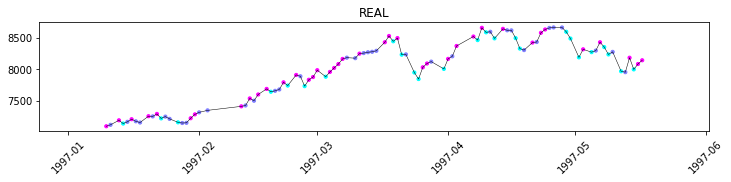

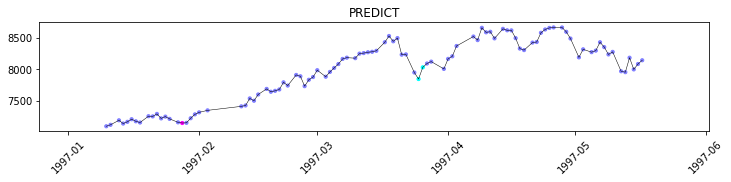

In [146]:
st=0
end=st+n+100

plt.figure(figsize=(12,2))
plt.title("REAL")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=y[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

plt.figure(figsize=(12,2))
plt.title("PREDICT")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=ypp[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

# 4.利用外資買賣超市值(籌碼資訊)來進行預測

## 資料處理

In [147]:
from keras.models import Model
from keras.layers import Input,concatenate,Dropout

In [148]:
df['年月日']=pd.to_datetime(df['年月日'])
dg['年月日']=pd.to_datetime(dg['年月日'])

In [149]:
d_txoc=df[['年月日','收盤價']]
d_txov=df[['年月日','成交值']]
d_ups=df[['年月日','漲跌平']]
d_of=df[['年月日','外資買賣超市值(百萬)']]

In [150]:
DF=pd.merge(d_txoc,d_txov)
DF=pd.merge(DF,d_ups)
DF=pd.merge(DF,d_of)
DF=DF.dropna()
DF.index=range(len(DF))
DF.head()

,年月日,收盤價,成交值,漲跌平,外資買賣超市值(百萬)
0,1996-09-02,6342.17,35463000,1.0,561.85
1,1996-09-03,6257.97,37428000,0.0,132.37
2,1996-09-04,6228.78,40213000,1.0,897.03
3,1996-09-05,6304.96,39001000,2.0,759.03
4,1996-09-06,6290.23,31401000,1.0,-142.73


In [151]:
dfc=np.array(DF['收盤價'])
dfv=np.array(DF['成交值'])
dfo=np.array(DF['外資買賣超市值(百萬)'])
dfups=np.array(DF['漲跌平'])
dfd=DF['年月日']

In [152]:
a=[]
b=[]
c=[]
y=[]
n=5
after=0
for i in range(len(DF.index)-n):
    a.append(dfc[after+i:after+i+n])
    b.append(dfv[after+i:after+i+n])
    c.append(dfo[after+i:after+i+n])
    y.append(DF.漲跌平[after+i+n])
a=np.array(a).reshape(len(a),n)
b=np.array(b).reshape(len(b),n)
c=np.array(c).reshape(len(b),n)
yy = np_utils.to_categorical(y, 3)

In [153]:
# 用了會預測結果很極端
'''for i in range(len(a)):
    a[i]=nor(a[i])
    b[i]=nor(b[i])
    c[i]=nor(c[i])'''

'for i in range(len(a)):\n    a[i]=nor(a[i])\n    b[i]=nor(b[i])\n    c[i]=nor(c[i])'

In [154]:
se=87
a_train,a_test,y_train,y_test=train_test_split(a,yy,test_size=0.3,random_state=se)
b_train,b_test,y_train,y_test=train_test_split(b,yy,test_size=0.3,random_state=se)
c_train,c_test,y_train,y_test=train_test_split(c,yy,test_size=0.3,random_state=se)

## 建立模型

In [155]:
f_1 = Dense(300,input_dim=n, activation='sigmoid')
g_1 = Dense(300,input_dim=n, activation='sigmoid')
h_1 = Dense(300,input_dim=n, activation='sigmoid')

z_1 = Dense(3, activation='softmax')

In [156]:
a0 = Input(shape=(n,))
b0 = Input(shape=(n,))
c0 = Input(shape=(n,))

a1 = f_1(a0)
b1 = g_1(b0)
c1 = h_1(c0)

u2 = concatenate([a1,c1])

q = z_1(u2)

In [157]:
model2 = Model([a0,b0,c0],q )
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 300)          1800        input_11[0][0]                   
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 300)          1800        input_13[0][0]                   
__________________________________________________________________________________________________
concatenat

In [158]:
model2.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,validation)

## 訓練與預測

In [159]:
model2.fit([a_train,b_train,c_train], y_train,batch_size=100,epochs=20)

Epoch 1/20
4009/4009 [==============================] - 1s 195us/step - loss: 1.1327 - acc: 0.3677
Epoch 2/20
4009/4009 [==============================] - 0s 23us/step - loss: 1.0958 - acc: 0.3881
Epoch 3/20
4009/4009 [==============================] - 0s 22us/step - loss: 1.0905 - acc: 0.3906
Epoch 4/20
4009/4009 [==============================] - 0s 19us/step - loss: 1.0801 - acc: 0.4143
Epoch 5/20
4009/4009 [==============================] - 0s 24us/step - loss: 1.0845 - acc: 0.4036
Epoch 6/20
4009/4009 [==============================] - 0s 23us/step - loss: 1.0770 - acc: 0.4116
Epoch 7/20
4009/4009 [==============================] - 0s 22us/step - loss: 1.0807 - acc: 0.4158
Epoch 8/20
4009/4009 [==============================] - 0s 19us/step - loss: 1.0789 - acc: 0.4201
Epoch 9/20
4009/4009 [==============================] - 0s 17us/step - loss: 1.0733 - acc: 0.4213
Epoch 10/20
4009/4009 [==============================] - 0s 22us/step - loss: 1.0678 - acc: 0.4221
Epoch 11/20
4009/4

In [160]:
model2.evaluate([a_test,b_test,c_test], y_test)

1719/1719 [==============================] - 0s 166us/step


[1.0905090510810511, 0.3938336240267462]

In [161]:
model2.predict([a_test,b_test,c_test])

array([[0.28168672, 0.35710236, 0.36121085],
       [0.30883858, 0.31363004, 0.37753144],
       [0.1970246 , 0.500205  , 0.3027704 ],
       ...,
       [0.22916281, 0.45244113, 0.31839597],
       [0.2718165 , 0.4066226 , 0.32156092],
       [0.3370021 , 0.34943736, 0.31356052]], dtype=float32)

## 視覺化

In [162]:
yp = model2.predict([a,b,c])
ypp=np.argmax(yp,axis=1)

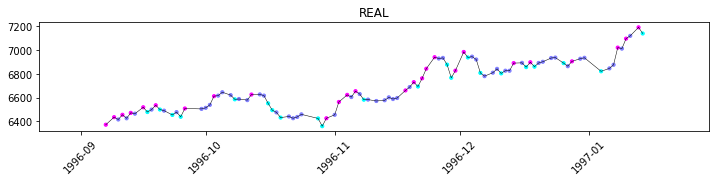

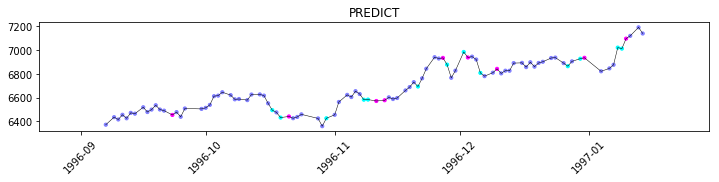

In [163]:
st=0
end=st+n+100

plt.figure(figsize=(12,2))
plt.title("REAL")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=y[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

plt.figure(figsize=(12,2))
plt.title("PREDICT")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=ypp[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

# 5.利用盤後總資訊(價格,籌碼)進行預測

## 資料處理

In [164]:
df['年月日']=pd.to_datetime(df['年月日'])
dg['年月日']=pd.to_datetime(dg['年月日'])

In [165]:
d_txoc=df[['年月日','收盤價']]
d_txov=df[['年月日','成交值']]
d_ups=df[['年月日','漲跌平']]

d_of=df[['年月日','外資買賣超市值(百萬)']]
d_self=df[['年月日','自營買賣超市值(百萬)']]

d_high=df[['年月日','最高價']]
d_low=df[['年月日','最低價']]
d_borrow=df[['年月日','融資增減(千元)']]
d_tick=df[['年月日','融券增減(張)']]

In [166]:
def MER (a):
    s=a[0]
    for i in range(len(a)-1):
        s=pd.merge(s,a[i+1])
    return s

In [167]:
DF=MER([d_txoc,d_txov,d_ups,d_of,d_self,d_high,d_low,d_borrow,d_tick])
DF=DF.dropna()
DF.index=range(len(DF))
DF.head()

,年月日,收盤價,成交值,漲跌平,外資買賣超市值(百萬),自營買賣超市值(百萬),最高價,最低價,融資增減(千元),融券增減(張)
0,1996-09-18,6499.02,45207000,1.0,284.71,0.0,6508.13,6452.37,902185.0,6506.0
1,1996-09-19,6535.59,51472000,2.0,403.21,0.0,6558.26,6535.59,1524201.0,6113.0
2,1996-09-20,6499.52,51295000,0.0,290.72,0.0,6546.36,6492.30,114456.0,-906.0
3,1996-09-21,6490.09,37692000,1.0,-220.08,0.0,6528.81,6485.92,418937.0,6841.0
4,1996-09-23,6453.98,40225000,0.0,24.20,0.0,6512.91,6447.46,-229998.0,8701.0


In [168]:
dfc=np.array(DF['收盤價'])
dfv=np.array(DF['成交值'])
dfh=np.array(DF['最高價'])
dfl=np.array(DF['最低價'])

dfo=np.array(DF['外資買賣超市值(百萬)'])
dfs=np.array(DF['自營買賣超市值(百萬)'])

dfb=np.array(DF['融資增減(千元)'])
dft=np.array(DF['融券增減(張)'])
dfups=np.array(DF['漲跌平'])
dfd=DF['年月日']

In [169]:
def take (l,dl,n,after):
     for j in range(len(dl)):
        for i in range(len(DF.index)-n):
            l[j].append(dl[j][after+i:after+i+n])
        l[j]=np.array(l[j]).reshape(len(l[j]),n)

In [170]:
a1=[]
a2=[]
a3=[]
a4=[]
b1=[]
b2=[]
c1=[]
c2=[]
n=5
after=0
l=[a1,a2,a3,a4,b1,b2,c1,c2]
take(l,[dfc,dfv,dfh,dfl,dfo,dfs,dfb,dft],n,after)

In [171]:
y=[]
for i in range(len(DF.index)-n):
    y.append(DF.漲跌平[after+i+n])
yy = np_utils.to_categorical(y, 3)

## 建立模型

In [172]:
x_train=[]
x_test=[]
F=[]
I0=[]
I1=[]
for i in range(len(l)):
    I0.append([])
    I1.append([])
    F.append([])
    x_train.append([])
    x_test.append([])

In [173]:
se=87
for i in range(len(l)):
    x_train[i],x_test[i],y_train,y_test=train_test_split(l[i],yy,test_size=0.3,random_state=se) 
    F[i] = Dense(300, activation='sigmoid')
    I0[i] = Input(shape=(n,))
    I1[i]= F[i](I0[i])

In [174]:
za= Dense(100, activation='sigmoid')
zb= Dense(100, activation='sigmoid')
zc= Dense(100, activation='sigmoid')

zz= Dense(3, activation='softmax')

In [175]:
u1 = za(concatenate(I1[0:4]))
u2 = zb(concatenate(I1[4:6]))
u3 = zc(concatenate(I1[6:8]))

q = zz(concatenate([u1,u2,u3]))

In [176]:
model3 = Model(I0,q )
model3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_18 (

In [177]:
model3.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,validation)

## 訓練與預測

In [178]:
model3.fit(x_train, y_train,batch_size=100,epochs=50)

Epoch 1/50
3892/3892 [==============================] - 1s 330us/step - loss: 1.1083 - acc: 0.3954
Epoch 2/50
3892/3892 [==============================] - 0s 78us/step - loss: 1.0796 - acc: 0.4155
Epoch 3/50
3892/3892 [==============================] - 0s 70us/step - loss: 1.0665 - acc: 0.4296
Epoch 4/50
3892/3892 [==============================] - 0s 79us/step - loss: 1.0518 - acc: 0.4453
Epoch 5/50
3892/3892 [==============================] - 0s 77us/step - loss: 1.0566 - acc: 0.4394
Epoch 6/50
3892/3892 [==============================] - 0s 78us/step - loss: 1.0374 - acc: 0.4671: 0s - loss: 1.0326 - acc: 0.
Epoch 7/50
3892/3892 [==============================] - 0s 79us/step - loss: 1.0293 - acc: 0.4776
Epoch 8/50
3892/3892 [==============================] - 0s 81us/step - loss: 1.0260 - acc: 0.4812
Epoch 9/50
3892/3892 [==============================] - 0s 78us/step - loss: 1.0146 - acc: 0.4951
Epoch 10/50
3892/3892 [==============================] - 0s 79us/step - loss: 1.0182 - a

In [181]:
model3.evaluate(x_test, y_test)

1669/1669 [==============================] - 0s 53us/step


[1.2693707408699324, 0.36728579995159333]

In [182]:
model3.predict(x_test)

array([[0.5219264 , 0.1934004 , 0.28467324],
       [0.6185115 , 0.22669856, 0.1547899 ],
       [0.48244035, 0.35487887, 0.16268077],
       ...,
       [0.36651865, 0.4419199 , 0.19156146],
       [0.38590774, 0.5045167 , 0.10957553],
       [0.21482559, 0.11427122, 0.67090327]], dtype=float32)

## 視覺化

In [183]:
yp = model3.predict(l)
ypp=np.argmax(yp,axis=1)

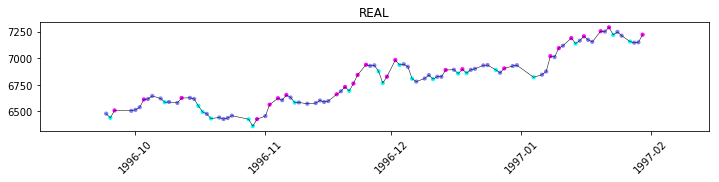

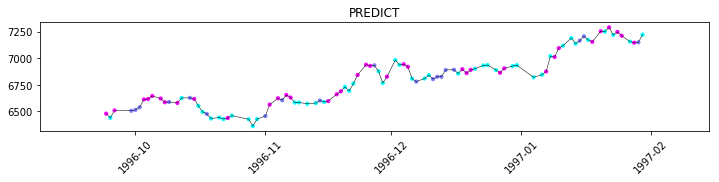

In [184]:
st=0
end=st+n+100

plt.figure(figsize=(12,2))
plt.title("REAL")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=y[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

plt.figure(figsize=(12,2))
plt.title("PREDICT")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=ypp[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)